#### PRNG evolution analysis with prediction attacks

The cell below contains experimental configuration settings in the form of a python dictionary.

In [1]:
from Core.Experiment import Experiment
#pip install keras-tqdm



Using TensorFlow backend.


Prng defs:  {'Middle_Square': '1946', 'Linear_Congruential': '1958', 'Lagged_Fibonacci': '1958', 'Wichmann_Hill': '1982', 'Park_Miller': '1988', 'Maximally_Periodic_Reciprocals': '1992', 'Mersenne_Twister': '1998'}

********** Lagged_Fibonacci Experiment Initiated**********

Configuration settings accepted: {'DISABLE_TQDMN': False, 'VERBOSE': 1, 'LOUD_LOGGING': True, 'IS_NEW_MODEL': True, 'PATH': './Lagged_Fibonacci/', 'SEED_METHOD': 'ticks_LF', 'PRNG_METHOD': 'Lagged_Fibonacci', 'NUM_SETS': 1000, 'SET_LEN': 1000, 'BATCH_SIZE': 15, 'NUM_EPOCHS': 5, 'CHKPNT_MONITOR': 'mae', 'CHKPNT_MODE': 'min', 'USE_VALIDATION': True, 'VALIDATION_SPLIT': 0.2, 'OVERRIDE_LOAD_COMPILATION': False, 'LR': 0.001, 'LOSS_METHOD': 'mean_absolute_error'}

Generating 1000 sets of 1000 using Lagged_Fibonacci ...

Generation Successful!

Normalizing and shaping data for training...

Training and testing sets were successfully generated with input and target data...

x_train (1000, 999, 1)
y_train (1000,)
x_test (10

Train on 800 samples, validate on 200 samples


Epoch 1/5


800/800 [==============================] - 2s 2ms/step - loss: 0.0059 - mae: 0.0059 - val_loss: 0.0056 - val_mae: 0.0056

Epoch 00001: mae improved from inf to 0.00586, saving model to ./Lagged_Fibonacci/model.hd5
Epoch 2/5


800/800 [==============================] - 1s 2ms/step - loss: 0.0020 - mae: 0.0020 - val_loss: 0.0018 - val_mae: 0.0018

Epoch 00002: mae improved from 0.00586 to 0.00200, saving model to ./Lagged_Fibonacci/model.hd5
Epoch 3/5


800/800 [==============================] - 1s 1ms/step - loss: 0.0017 - mae: 0.0017 - val_loss: 0.0025 - val_mae: 0.0025

Epoch 00003: mae improved from 0.00200 to 0.00171, saving model to ./Lagged_Fibonacci/model.hd5
Epoch 4/5


800/800 [==============================] - 1s 1ms/step - loss: 0.0015 - mae: 0.0015 - val_loss: 0.0016 - val_mae: 0.0016

Epoch 00004: mae improved from 0.00171 to 0.00154, saving model to ./Lagged_Fibonacci/model.hd5
Epoch 5/5


800/800 [==============================] - 1s 2ms/step - loss: 0.0016 - mae: 0.0016 - val_loss: 0.0016 - val_mae: 0.0016

Epoch 00005: mae did not improve from 0.00154

Training Finished!

Printing results...

History Keys:  dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


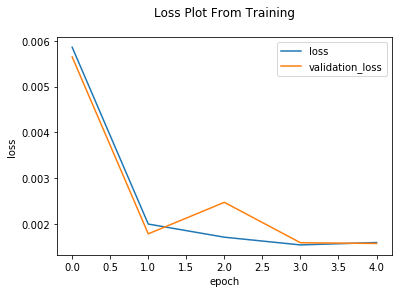

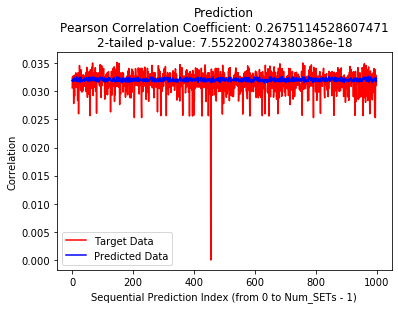


Pearson Correlation Coefficient: 0.2675114528607471
2-tailed p-value:                 7.552200274380386e-18 

Finished training, testing, and logging. Files saved to ./Lagged_Fibonacci/ 

********** Lagged_Fibonacci finished**********


In [7]:
from Core.PrngMethods import Get_Defs

defs = Get_Defs()

print('Prng defs: ',defs)  

configuration = {
        'DISABLE_TQDMN' : False,
        'VERBOSE' : 1,
        'LOUD_LOGGING': True,
    
        'IS_NEW_MODEL' : True,
        'PATH' : './Lagged_Fibonacci/',
        'SEED_METHOD' : 'ticks_LF',               
        'PRNG_METHOD' : 'Lagged_Fibonacci',       
        'NUM_SETS' : 1000,                     
        'SET_LEN': 1000,                                               
        'BATCH_SIZE': 15,
        'NUM_EPOCHS': 5,
        
        'CHKPNT_MONITOR' : 'mae',
        'CHKPNT_MODE' : 'min',
        
        
        'USE_VALIDATION' : True ,
        'VALIDATION_SPLIT' :  0.2,
    
        'OVERRIDE_LOAD_COMPILATION' : False,
        'LR': .001,
        'LOSS_METHOD':'mean_absolute_error' #mae
    }  


E = Experiment(configuration)
E.perform()

In [11]:
def lf(seed, listlength, j=7 , k=10):
    #litte dirty and expensive with validation checks
    #validation checks
    
    
    
    # 0 < j < k
    if(not(0 < j and j < k)):
        return
    
    #If addition is used, it is required that at least one of the first k values chosen to initialise the generator be odd;
    flag = False
    for i in range(len(str(seed))):
        if(i > k):
            flag = True
            break
        if(int(str(seed)[i]) % 2 != 0):
            flag = True
            break
    
    #implementation  
    numlist = []
    seedlist = []
    
    for i in range(len(str(seed))):
        seedlist.append(str(seed)[i])
        
    if(flag):
        for n in range(listlength):
            for i in range(len(seedlist)):
                if i is 0:
                    val = int(seedlist[j-1]) + int(seedlist[k-1]) % 10 #arbitrary mod?
                    numlist.append(val)
                elif 0 < i < len(seedlist) - 1:
                    seedlist[i] = seedlist[i+1] # shift array
                else:
                    seedlist[i] = val
    return numlist


print(lf(8022519040 , 1000))


[9, 9, 13, 3, 12, 11, 14, 7, 19, 20, 14, 11, 20, 20, 14, 15, 25, 25, 19, 24, 29, 34, 23, 27, 36, 40, 23, 30, 36, 46, 29, 39, 45, 51, 30, 39, 54, 55, 35, 44, 58, 63, 38, 52, 60, 63, 41, 53, 63, 66, 47, 60, 63, 69, 56, 66, 69, 78, 64, 70, 69, 87, 71, 71, 70, 87, 78, 79, 79, 96, 84, 83, 82, 98, 92, 85, 87, 105, 97, 92, 89, 114, 101, 93, 92, 116, 107, 100, 92, 118, 115, 105, 97, 125, 120, 105, 102, 127, 127, 112, 104, 131, 128, 120, 104, 135, 133, 123, 107, 142, 135, 128, 115, 147, 142, 130, 115, 152, 144, 134, 119, 161, 145, 139, 128, 169, 154, 143, 131, 170, 154, 147, 138, 178, 162, 149, 147, 185, 167, 156, 153, 188, 175, 161, 154, 192, 177, 168, 162, 194, 181, 169, 171, 195, 186, 175, 176, 201, 187, 182, 178, 209, 196, 188, 186, 215, 201, 189, 195, 220, 201, 190, 195, 225, 206, 196, 201, 226, 212, 198, 209, 235, 217, 205, 214, 239, 226, 211, 215, 244, 230, 211, 216, 250, 230, 211, 217, 257, 237, 218, 225, 262, 239, 227, 232, 264, 243, 230, 232, 266, 249, 239, 241, 267, 256, 245, 246, 27